### Import Libraries 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings("ignore")

### Import first Dataset for project
#### Household_Income2021

In [2]:
# Read csv file into a pandas dataframe
df1 = pd.read_csv("Household_Income2021.csv")

In [3]:
df1.head()

,Statistic Label,Year,County,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2021,Ireland,Euro Million,110894.16
1,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Carlow,Euro Million,1169.88
2,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Cavan,Euro Million,1338.61
3,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Clare,Euro Million,2386.89
4,Compensation of Employees (i.e. Wages and Sala...,2021,Co. Cork,Euro Million,12864.31


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  486 non-null    object 
 1   Year             486 non-null    int64  
 2   County           486 non-null    object 
 3   UNIT             486 non-null    object 
 4   VALUE            486 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.1+ KB


In [5]:
unique_values = df1['Statistic Label'].unique()

# Print the unique values
print(unique_values)

["Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)"
 'Income of Self Employed'
 'Rent of dwellings (including imputed rent of owner-occupied dwellings)'
 'Net Interest and Dividends (payments by households of interest are deducted from interest received by households)'
 'Primary Income' 'Social Benefits and Other Current Transfers'
 'Total Household Income' 'Total Income per Person'
 'Index of Total Income per Person' 'Current Taxes on Income'
 'Disposable Household Income' 'Disposable Income per Person'
 'Index of Disposable Income per Person'
 'Disposable Income per Person (excluding Rent)'
 'Index of Disposable Income per Person (excluding Rent)'
 'Social Benefits and Other Current Transfers per Person'
 'Persons at Work' 'Percentage of Persons at Work']


In [6]:
# Basic EDA 

df1.shape

(486, 5)

In [7]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  486 non-null    object 
 1   Year             486 non-null    int64  
 2   County           486 non-null    object 
 3   UNIT             486 non-null    object 
 4   VALUE            486 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.1+ KB


In [8]:
df1.describe()


,Year,VALUE
count,486.0,486.000000
mean,2021.0,7363.131667
std,0.0,16075.126284
min,2021.0,0.550000
25%,2021.0,99.700000
50%,2021.0,962.120000
75%,2021.0,7043.987500
max,2021.0,180057.810000


In [9]:
df1.isnull().sum()

Statistic Label    0
Year               0
County             0
UNIT               0
VALUE              0
dtype: int64

In [10]:
# Keep only columns we want 

df1 = df1[df1['Statistic Label'] == 'Total Household Income']


In [11]:
#Rename columns to better explain data

df1.rename(columns={'VALUE': 'Household Income (million EUR)'}, inplace=True)

In [12]:
df1.head()

,Statistic Label,Year,County,UNIT,Household Income (million EUR)
162,Total Household Income,2021,Ireland,Euro Million,180057.81
163,Total Household Income,2021,Co. Carlow,Euro Million,2032.30
164,Total Household Income,2021,Co. Cavan,Euro Million,2333.79
165,Total Household Income,2021,Co. Clare,Euro Million,3892.75
166,Total Household Income,2021,Co. Cork,Euro Million,20711.12


In [13]:
# Drop redundant columns 

df1.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [14]:
df1.head()

,Year,County,Household Income (million EUR)
162,2021,Ireland,180057.81
163,2021,Co. Carlow,2032.30
164,2021,Co. Cavan,2333.79
165,2021,Co. Clare,3892.75
166,2021,Co. Cork,20711.12


In [15]:
#Re-import full dataset

df2 = pd.read_csv("Household_Income2021.csv")

In [16]:
# Keep only columns we want 

df2 = df2[df2['Statistic Label'] == 'Percentage of Persons at Work']

In [17]:
#Rename columns to better explain data

df2.rename(columns={'VALUE': 'Persons at Work (%)'}, inplace=True)

In [18]:
# Drop redundant columns 

df2.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [19]:
df2.head()

,Year,County,Persons at Work (%)
459,2021,Ireland,100.00
460,2021,Co. Carlow,0.88
461,2021,Co. Cavan,1.53
462,2021,Co. Clare,1.12
463,2021,Co. Cork,12.83


In [20]:
#Re-import full dataset

df3 = pd.read_csv("Household_Income2021.csv")

In [21]:
# Keep only rows we want 

df3 = df3[df3['Statistic Label'] == 'Disposable Income per Person']

In [22]:
#Rename columns to better explain data

df3.rename(columns={'VALUE': 'Disposable Income (pp)'}, inplace=True)

In [23]:
df3.head()

,Statistic Label,Year,County,UNIT,Disposable Income (pp)
297,Disposable Income per Person,2021,Ireland,Euro,24376.10
298,Disposable Income per Person,2021,Co. Carlow,Euro,24606.46
299,Disposable Income per Person,2021,Co. Cavan,Euro,21096.88
300,Disposable Income per Person,2021,Co. Clare,Euro,21834.88
301,Disposable Income per Person,2021,Co. Cork,Euro,24599.56


In [24]:
# Drop redundant columns 

df3.drop(columns=['Statistic Label', 'UNIT'], inplace=True)

In [25]:
df3.head()

,Year,County,Disposable Income (pp)
297,2021,Ireland,24376.10
298,2021,Co. Carlow,24606.46
299,2021,Co. Cavan,21096.88
300,2021,Co. Clare,21834.88
301,2021,Co. Cork,24599.56


In [26]:
#Merge three individual dataframes that were filtered and edited above

# Merge df1 and df2 on 'County' column
df = pd.merge(df1, df2, on='County', how='inner')

# Merge df and df3 on'County' common column
df = pd.merge(df, df3, on='County', how='inner')


In [27]:
df.head()

,Year_x,County,Household Income (million EUR),Year_y,Persons at Work (%),Year,Disposable Income (pp)
0,2021,Ireland,180057.81,2021,100.00,2021,24376.10
1,2021,Co. Carlow,2032.30,2021,0.88,2021,24606.46
2,2021,Co. Cavan,2333.79,2021,1.53,2021,21096.88
3,2021,Co. Clare,3892.75,2021,1.12,2021,21834.88
4,2021,Co. Cork,20711.12,2021,12.83,2021,24599.56


In [28]:
# Drop redundant columns (all years are 2021)

df.drop(columns=['Year_x', 'Year_y', 'Year'], inplace=True)

In [29]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp)
0,Ireland,180057.81,100.00,24376.10
1,Co. Carlow,2032.30,0.88,24606.46
2,Co. Cavan,2333.79,1.53,21096.88
3,Co. Clare,3892.75,1.12,21834.88
4,Co. Cork,20711.12,12.83,24599.56


In [30]:
df.shape

(27, 4)

In [31]:
# Import Activities Dataframe

df4 = pd.read_csv("Activities2021.csv")

In [32]:
#Basic exploration of data frame

df4.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Ireland,"Food and Drink,Restaurant,Local Produce"
1,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
2,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,NaN,Ireland,"Traditionally Irish,Venue,Music"
3,Kilclooney Wood,http://www.coillte.ie,NaN,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
4,The Ring of Kerry Cycle Route,NaN,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling


In [33]:
df4.shape

(6107, 9)

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6107 non-null   object 
 1   Url              5681 non-null   object 
 2   Telephone        5230 non-null   object 
 3   Longitude        6107 non-null   float64
 4   Latitude         6107 non-null   float64
 5   AddressRegion    6107 non-null   object 
 6   AddressLocality  5996 non-null   object 
 7   AddressCountry   6107 non-null   object 
 8   Tags             5949 non-null   object 
dtypes: float64(2), object(7)
memory usage: 429.5+ KB


In [35]:
# Get sum counts of individual activities for each County

county_counts = df4['AddressRegion'].value_counts()

print(county_counts)

AddressRegion
Dublin       1140
Cork          653
Kerry         535
Galway        504
Donegal       391
Mayo          336
Clare         324
Waterford     215
Wicklow       200
Wexford       192
Sligo         191
Limerick      182
Kilkenny      181
Tipperary     156
Kildare       133
Meath         123
Louth         104
Westmeath     103
Carlow         76
Offaly         69
Roscommon      66
Laois          57
Cavan          55
Leitrim        53
Monaghan       41
Longford       27
Name: count, dtype: int64


In [36]:
# Create new df with the sum of activites per County

# Create DataFrame from county_counts Series
df5 = pd.DataFrame({'AddressRegion': county_counts.index, 'Count': county_counts.values})

print(df5)

   AddressRegion  Count
0         Dublin   1140
1           Cork    653
2          Kerry    535
3         Galway    504
4        Donegal    391
5           Mayo    336
6          Clare    324
7      Waterford    215
8        Wicklow    200
9        Wexford    192
10         Sligo    191
11      Limerick    182
12      Kilkenny    181
13     Tipperary    156
14       Kildare    133
15         Meath    123
16         Louth    104
17     Westmeath    103
18        Carlow     76
19        Offaly     69
20     Roscommon     66
21         Laois     57
22         Cavan     55
23       Leitrim     53
24      Monaghan     41
25      Longford     27


In [37]:
# Add a new row entry to include a column with sum of all counts for 'Ireland'

# Calculate the sum of all counts
total_count = df5['Count'].sum()

# Create new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df5 = pd.concat([df5, ireland_row], ignore_index=True)

print(df5)

   AddressRegion  Count
0         Dublin   1140
1           Cork    653
2          Kerry    535
3         Galway    504
4        Donegal    391
5           Mayo    336
6          Clare    324
7      Waterford    215
8        Wicklow    200
9        Wexford    192
10         Sligo    191
11      Limerick    182
12      Kilkenny    181
13     Tipperary    156
14       Kildare    133
15         Meath    123
16         Louth    104
17     Westmeath    103
18        Carlow     76
19        Offaly     69
20     Roscommon     66
21         Laois     57
22         Cavan     55
23       Leitrim     53
24      Monaghan     41
25      Longford     27
26       Ireland   6107


In [38]:
#Rename columns to better explain data
df5.rename(columns={'AddressRegion': 'County', 'Count': 'Total Activities'}, inplace=True)

df5.head()

,County,Total Activities
0,Dublin,1140
1,Cork,653
2,Kerry,535
3,Galway,504
4,Donegal,391


In [39]:
# Check all 'County' names are the same before df merge

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df5['County']: ", df5['County'].unique())


Unique values in df['County']:  ['Ireland' 'Co. Carlow' 'Co. Cavan' 'Co. Clare' 'Co. Cork' 'Co. Donegal'
 'Co. Dublin' 'Co. Galway' 'Co. Kerry' 'Co. Kildare' 'Co. Kilkenny'
 'Co. Laois' 'Co. Leitrim' 'Co. Limerick' 'Co. Longford' 'Co. Louth'
 'Co. Mayo' 'Co. Meath' 'Co. Monaghan' 'Co. Offaly' 'Co. Roscommon'
 'Co. Sligo' 'Co. Tipperary' 'Co. Waterford' 'Co. Westmeath' 'Co. Wexford'
 'Co. Wicklow']
Unique values in df5['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [40]:
# Remove iconsistencies between two df's to be merged

df['County'] = df['County'].str.replace('Co. ', '')

In [41]:
# Check this has been successful

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df5['County']: ", df5['County'].unique())

Unique values in df['County']:  ['Ireland' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway'
 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo'
 'Tipperary' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']
Unique values in df5['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [42]:
# Merge df and df5 on 'County' column

df = pd.merge(df, df5, on='County', how='inner')

In [43]:
df.shape

(27, 5)

In [44]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities
0,Ireland,180057.81,100.00,24376.10,6107
1,Carlow,2032.30,0.88,24606.46,76
2,Cavan,2333.79,1.53,21096.88,55
3,Clare,3892.75,1.12,21834.88,324
4,Cork,20711.12,12.83,24599.56,653


In [45]:
# Import Accomodation dataframe

df6 = pd.read_csv("Accommodation2021.csv")

In [46]:
df6.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping


In [47]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2337 non-null   object 
 1   Url              2176 non-null   object 
 2   Telephone        2333 non-null   object 
 3   Longitude        2337 non-null   float64
 4   Latitude         2337 non-null   float64
 5   AddressRegion    2337 non-null   object 
 6   AddressLocality  2174 non-null   object 
 7   AddressCountry   2337 non-null   object 
 8   Tags             2337 non-null   object 
dtypes: float64(2), object(7)
memory usage: 164.4+ KB


In [48]:
# Get sum counts of individual activities for each County
county_counts2 = df6['AddressRegion'].value_counts()

# Create new df with the sum of accomodation per County
df6 = pd.DataFrame({'AddressRegion': county_counts2.index, 'Count': county_counts2.values})

# Calculate the sum of all counts
total_count = df6['Count'].sum()

# Create a new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df6 = pd.concat([df6, ireland_row], ignore_index=True)

df6.head()

,AddressRegion,Count
0,Kerry,308
1,Cork,252
2,Galway,243
3,Dublin,234
4,Donegal,176


In [49]:
#Rename columns to better explain data
df6.rename(columns={'AddressRegion': 'County', 'Count': 'Total Accommodation'}, inplace=True)

df6.head()

,County,Total Accommodation
0,Kerry,308
1,Cork,252
2,Galway,243
3,Dublin,234
4,Donegal,176


In [50]:
# Merge df and df6 on another common column

df = pd.merge(df, df6, on='County', how='inner')

In [51]:
df.head(5)

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation
0,Ireland,180057.81,100.00,24376.10,6107,2337
1,Carlow,2032.30,0.88,24606.46,76,21
2,Cavan,2333.79,1.53,21096.88,55,41
3,Clare,3892.75,1.12,21834.88,324,156
4,Cork,20711.12,12.83,24599.56,653,252


In [52]:
df.shape

(27, 6)

In [53]:
# Import Attractions Dataframe

df7 = pd.read_csv("Attractions2021.csv")

In [54]:
df7.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dun na Rí Forest Park,http://www.coillte.ie/site/dun-a-ri-forest-park/,353494331942,-6.792661,53.918978,Cavan,Kingscourt,Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
1,Newcastle Woods,https://www.longford.ie/en/visit/trails/newcas...,353433343509,-7.726107,53.562124,Longford,NaN,Ireland,"Walking,Natural Landscape"
2,Rinn Duin Castle Loop,https://www.sportireland.ie/outdoors/walking/t...,+353(0)906630252,-8.004326,53.544197,Roscommon,NaN,Republic of Ireland,"Walking,Castle,Historic Houses and Castle,Ruins"
3,Knock Museum,https://www.knockshrine.ie/key-places-to-visit...,353949388100,-8.917153,53.790004,Mayo,Knock,Ireland,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
4,Michael J Quill Centre,http://www.historic-ireland.com/places/778.html,353646685511,-9.461430,51.902656,Kerry,Kilgarvan,Republic of Ireland,Museums and Attraction


In [55]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             183 non-null    object 
 1   Url              139 non-null    object 
 2   Telephone        130 non-null    object 
 3   Longitude        183 non-null    float64
 4   Latitude         183 non-null    float64
 5   AddressRegion    183 non-null    object 
 6   AddressLocality  120 non-null    object 
 7   AddressCountry   183 non-null    object 
 8   Tags             183 non-null    object 
dtypes: float64(2), object(7)
memory usage: 13.0+ KB


In [56]:
# Get sum counts of individual attractions for each County
county_counts3 = df7['AddressRegion'].value_counts()

# Create new df with the sum of accomodation per County
df7 = pd.DataFrame({'AddressRegion': county_counts3.index, 'Count': county_counts3.values})

# Calculate the sum of all counts
total_count = df7['Count'].sum()

# Create a new DataFrame for 'Ireland' with the total count
ireland_row = pd.DataFrame({'AddressRegion': ['Ireland'], 'Count': [total_count]})

# Concatenate df5 and ireland_row
df7 = pd.concat([df7, ireland_row], ignore_index=True)

df7.head()

,AddressRegion,Count
0,Kerry,33
1,Cork,26
2,Galway,14
3,Mayo,14
4,Wexford,10


In [57]:
#Rename columns to better explain data
df7.rename(columns={'AddressRegion': 'County', 'Count': 'Total Attractions'}, inplace=True)

df7.head()

,County,Total Attractions
0,Kerry,33
1,Cork,26
2,Galway,14
3,Mayo,14
4,Wexford,10


In [58]:
df7.shape

(25, 2)

In [59]:
df.shape

(27, 6)

In [60]:
# We can see from the above that we are missing two 'County' entries so we must identify these before manually imputing these 
# missing values

print("Unique values in df['County']: ", df['County'].unique())
print("Unique values in df7['County']: ", df5['County'].unique())

Unique values in df['County']:  ['Ireland' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Galway'
 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo'
 'Tipperary' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']
Unique values in df7['County']:  ['Dublin' 'Cork' 'Kerry' 'Galway' 'Donegal' 'Mayo' 'Clare' 'Waterford'
 'Wicklow' 'Wexford' 'Sligo' 'Limerick' 'Kilkenny' 'Tipperary' 'Kildare'
 'Meath' 'Louth' 'Westmeath' 'Carlow' 'Offaly' 'Roscommon' 'Laois' 'Cavan'
 'Leitrim' 'Monaghan' 'Longford' 'Ireland']


In [61]:
# Find missing values in df7 compared to df

missing_counties = set(df['County']) - set(df7['County'])

print("Missing counties in df7 that are in df:")
for county in missing_counties:
    print(county)

Missing counties in df7 that are in df:
Offaly
Monaghan


In [62]:
# Create temporary df with the missing entries
new_entries = pd.DataFrame({'County': ['Offaly', 'Monaghan'], 'Total Attractions': [0, 0]})

# Concatenate df7 and temp df
df7 = pd.concat([df7, new_entries], ignore_index=True)

print(df7)

       County  Total Attractions
0       Kerry                 33
1        Cork                 26
2      Galway                 14
3        Mayo                 14
4     Wexford                 10
5       Sligo                  8
6   Waterford                  8
7       Louth                  7
8    Limerick                  7
9     Donegal                  7
10  Tipperary                  7
11   Kilkenny                  5
12      Meath                  5
13      Clare                  5
14      Laois                  4
15     Carlow                  4
16    Kildare                  4
17   Longford                  3
18    Leitrim                  3
19      Cavan                  3
20    Wicklow                  2
21  Roscommon                  2
22     Dublin                  1
23  Westmeath                  1
24    Ireland                183
25     Offaly                  0
26   Monaghan                  0


In [63]:
df7.shape

(27, 2)

In [64]:
# Merge df and df6 on another common column

df = pd.merge(df, df7, on='County', how='inner')

In [65]:
df.shape

(27, 7)

### Exploratory Data Analysis

In [66]:
df.head()


,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
0,Ireland,180057.81,100.00,24376.10,6107,2337,183
1,Carlow,2032.30,0.88,24606.46,76,21,4
2,Cavan,2333.79,1.53,21096.88,55,41,3
3,Clare,3892.75,1.12,21834.88,324,156,5
4,Cork,20711.12,12.83,24599.56,653,252,26


In [67]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          27 non-null     object 
 1   Household Income (million EUR)  27 non-null     float64
 2   Persons at Work (%)             27 non-null     float64
 3   Disposable Income (pp)          27 non-null     float64
 4   Total Activities                27 non-null     int64  
 5   Total Accommodation             27 non-null     int64  
 6   Total Attractions               27 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ KB


In [68]:
df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
count,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000
mean,13337.615185,7.407407,22690.948148,452.37037,173.111111,13.555556
std,35298.214552,19.420785,2017.139860,1155.88162,440.463771,34.679115
min,980.930000,0.550000,19252.820000,27.00000,8.000000,0.000000
25%,2346.945000,1.380000,21187.975000,72.50000,34.500000,3.000000
50%,4134.700000,2.020000,22542.760000,181.00000,57.000000,5.000000
75%,6326.960000,3.740000,24225.585000,330.00000,149.500000,8.000000
max,180057.810000,100.000000,27958.060000,6107.00000,2337.000000,183.000000


In [69]:
df.describe(include="object")

,County
count,27
unique,27
top,Ireland
freq,1


In [70]:
# Save current df (including Ireland col) into a new df 

df_all = df.copy()

In [71]:
# Drop Ireland 'Total' column from our durrent df

df = df[df['County'] != 'Ireland']

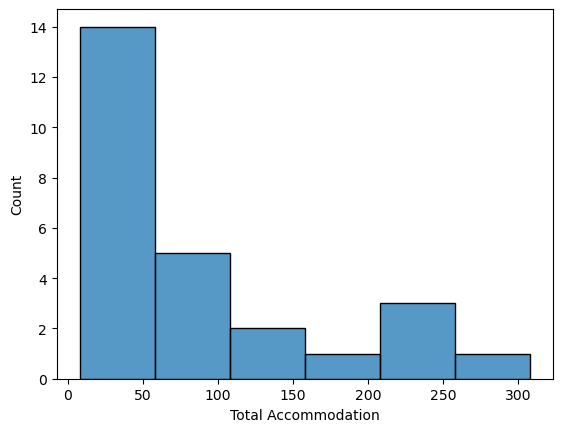

In [72]:
# Plot a histogram to see the spread of Accomodation across Counties

sns.histplot(data=df, x="Total Accommodation");

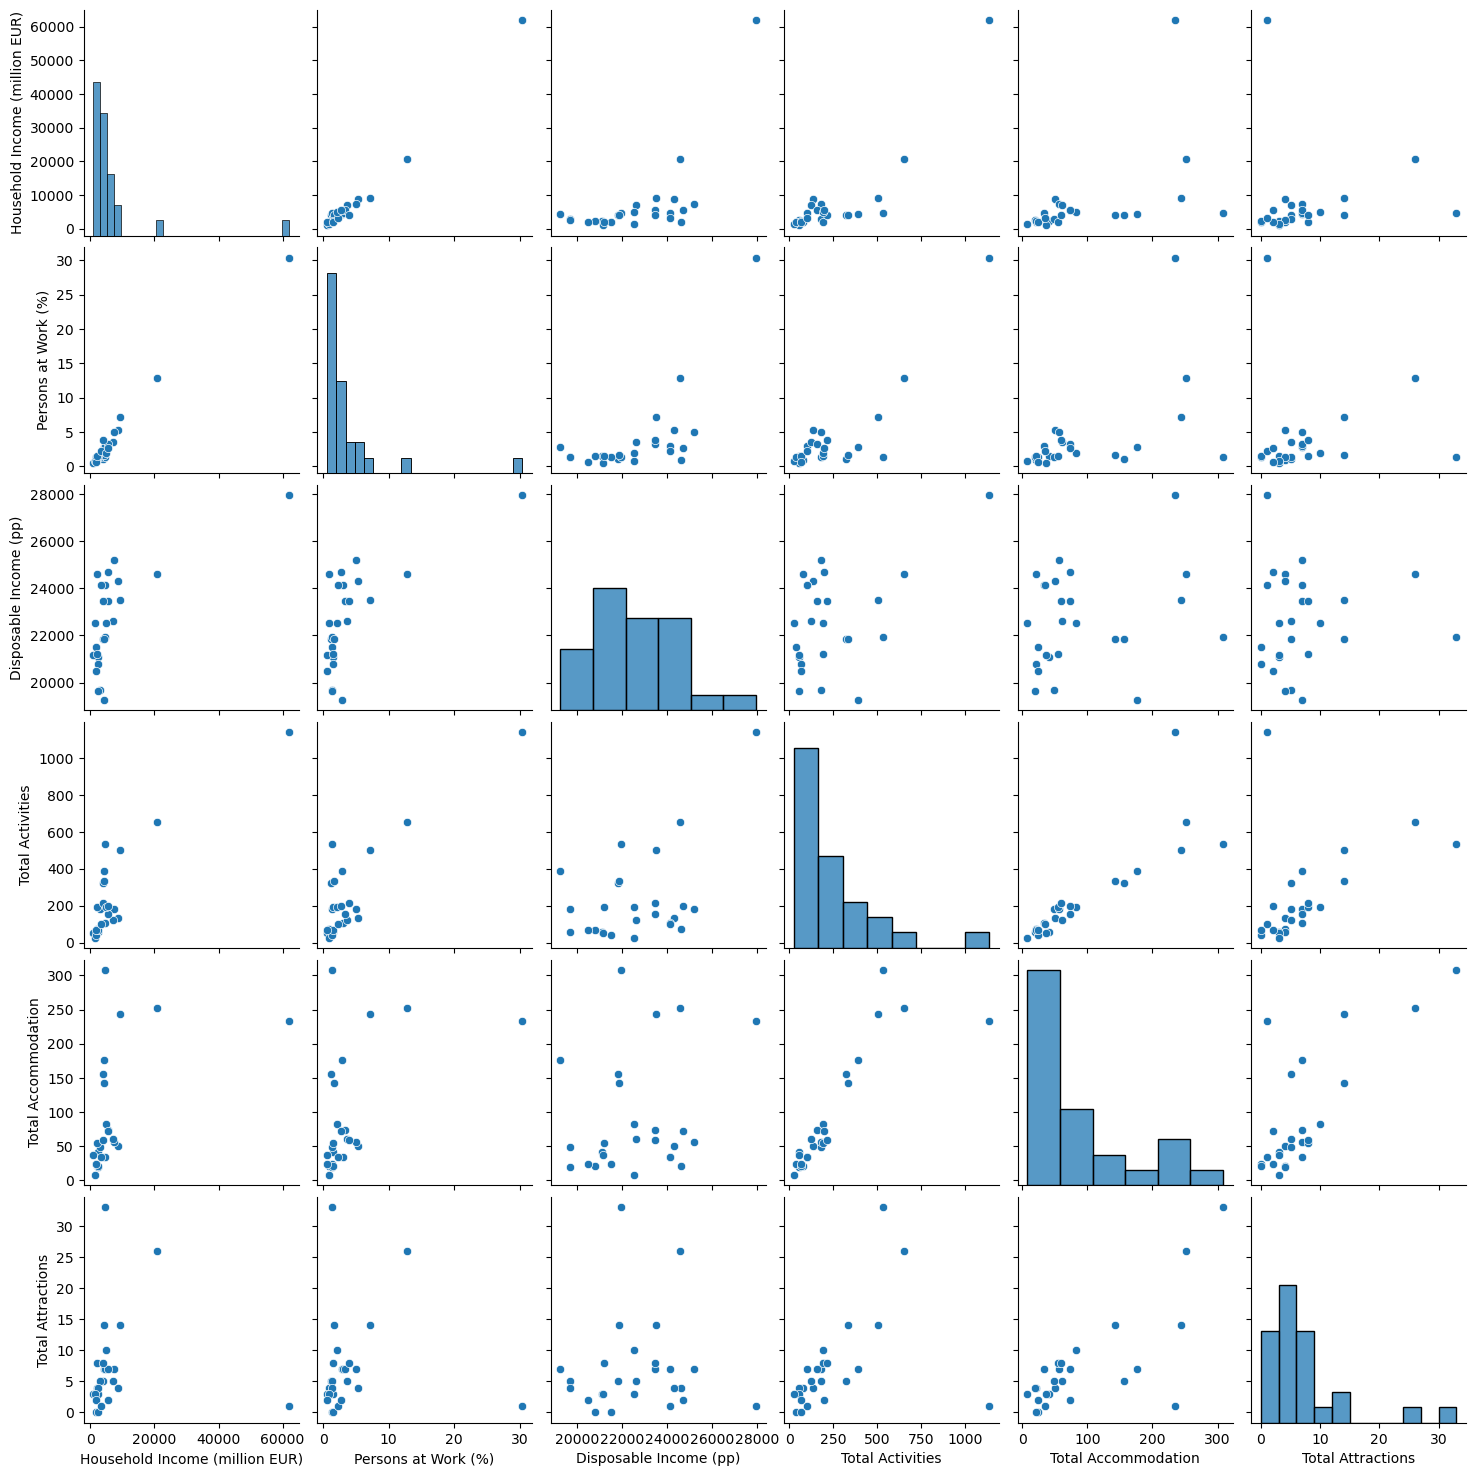

In [73]:
# Visualize pairwise relationships between numerical variables


sns.pairplot(df)

In [74]:
df.to_csv('df_merged.csv', index=False)

## Statistics Questions 

### 1. Data Summarisation


In [75]:
# Read csv file into a pandas dataframe
df = pd.read_csv("df_merged.csv")

In [76]:
# Get central tendencies of data

df.describe()

,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6925.300000,3.846154,22626.134615,234.884615,89.884615,7.038462
std,11883.395002,6.010675,2028.213265,247.627353,85.254596,7.623547
min,980.930000,0.550000,19252.820000,27.000000,8.000000,0.000000
25%,2340.367500,1.380000,21178.392500,70.750000,34.250000,3.000000
50%,4093.015000,1.830000,22535.025000,168.500000,56.000000,5.000000
75%,5575.495000,3.530000,24146.982500,296.750000,127.750000,7.750000
max,61920.180000,30.420000,27958.060000,1140.000000,308.000000,33.000000


In [77]:
# Exclude object column
col_exclude = ['County']  
num_cols = df.drop(columns=col_exclude).select_dtypes(include=['number'])

In [78]:
# Get mean of numerical columns 

mean_values = num_cols.mean()

# Print title
print("Mean of Numerical Columns")
print("------------")  

# Print results
print(mean_values)

Mean of Numerical Columns
------------
Household Income (million EUR)     6925.300000
Persons at Work (%)                   3.846154
Disposable Income (pp)            22626.134615
Total Activities                    234.884615
Total Accommodation                  89.884615
Total Attractions                     7.038462
dtype: float64


In [79]:
# Get mode of numerical columns 

mode_values = num_cols.mode()

# Print title
print("Mode of Numerical Columns")
print("------------")  

# Print results
print(mode_values)

Mode of Numerical Columns
------------
    Household Income (million EUR)  Persons at Work (%)  \
0                           980.93                 1.38   
1                          1325.33                 1.53   
2                          1894.20                  NaN   
3                          1937.74                  NaN   
4                          2032.30                  NaN   
5                          2055.02                  NaN   
6                          2333.79                  NaN   
7                          2360.10                  NaN   
8                          2479.65                  NaN   
9                          2926.90                  NaN   
10                         3199.79                  NaN   
11                         3892.75                  NaN   
12                         4051.33                  NaN   
13                         4134.70                  NaN   
14                         4242.44                  NaN   
15               

In [80]:
# Get median of numerical columns 

med_values = num_cols.median()

# Print title
print("Median of Numerical Columns")
print("------------")  

# Print results
print(med_values)

Median of Numerical Columns
------------
Household Income (million EUR)     4093.015
Persons at Work (%)                   1.830
Disposable Income (pp)            22535.025
Total Activities                    168.500
Total Accommodation                  56.000
Total Attractions                     5.000
dtype: float64


In [81]:
# Get variance of numerical columns 

variance_values = num_cols.var()

# Print title
print("Variance of Numerical Columns")
print("------------")  

# Print results
print(variance_values)

Variance of Numerical Columns
------------
Household Income (million EUR)    1.412151e+08
Persons at Work (%)               3.612821e+01
Disposable Income (pp)            4.113649e+06
Total Activities                  6.131931e+04
Total Accommodation               7.268346e+03
Total Attractions                 5.811846e+01
dtype: float64


In [82]:
# Get standard deviation of numerical columns 

std_values = num_cols.std()

# Print title
print("Standard Deviation of Numerical Columns")
print("------------")  

# Print results
print(std_values)

Standard Deviation of Numerical Columns
------------
Household Income (million EUR)    11883.395002
Persons at Work (%)                   6.010675
Disposable Income (pp)             2028.213265
Total Activities                    247.627353
Total Accommodation                  85.254596
Total Attractions                     7.623547
dtype: float64


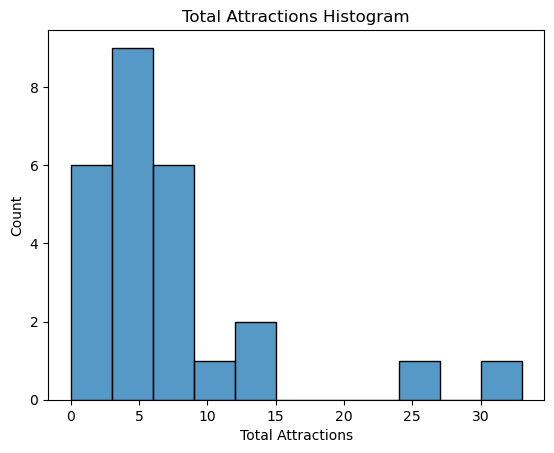

In [83]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Attractions")
plt.title('Total Attractions Histogram')
plt.show();

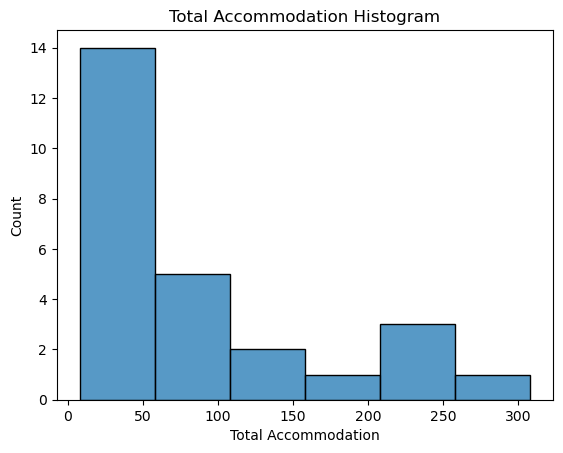

In [84]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Accommodation")
plt.title('Total Accommodation Histogram')
plt.show();

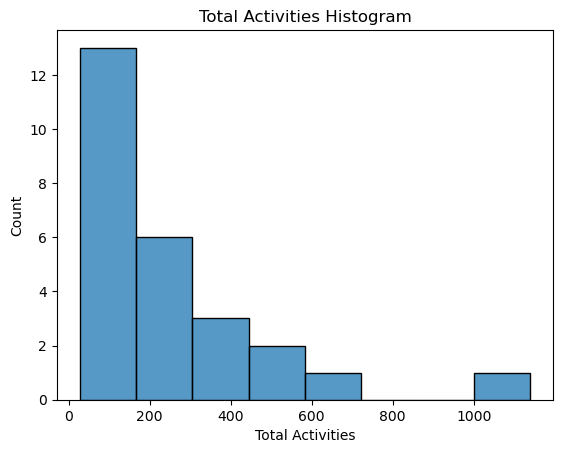

In [85]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Total Activities")
plt.title('Total Activities Histogram')
plt.show();

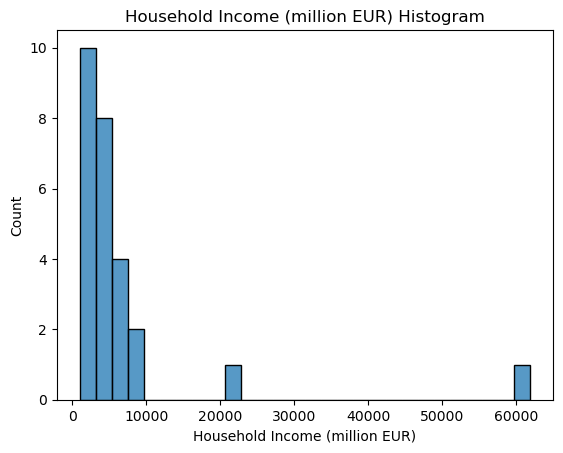

In [86]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Household Income (million EUR)")
plt.title('Household Income (million EUR) Histogram')
plt.show();

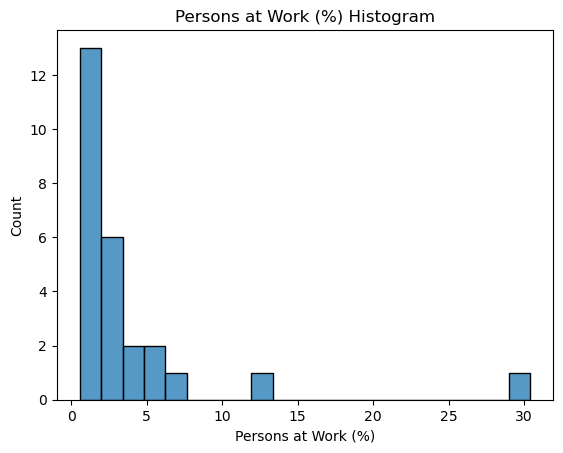

In [87]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Persons at Work (%)")
plt.title('Persons at Work (%) Histogram')
plt.show();

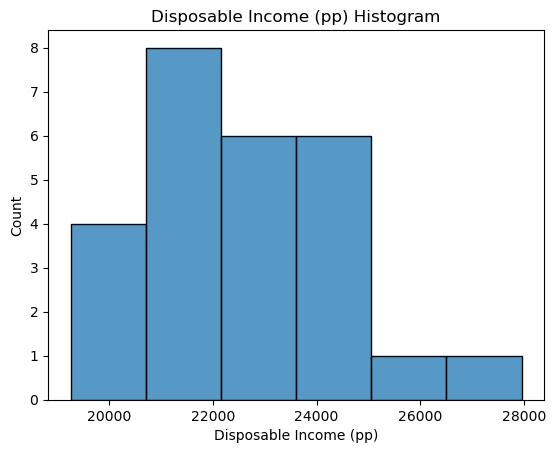

In [88]:
# Plotting histograms to see distributions

sns.histplot(data=df, x="Disposable Income (pp)");
plt.title('Disposable Income (pp) Histogram')
plt.show()

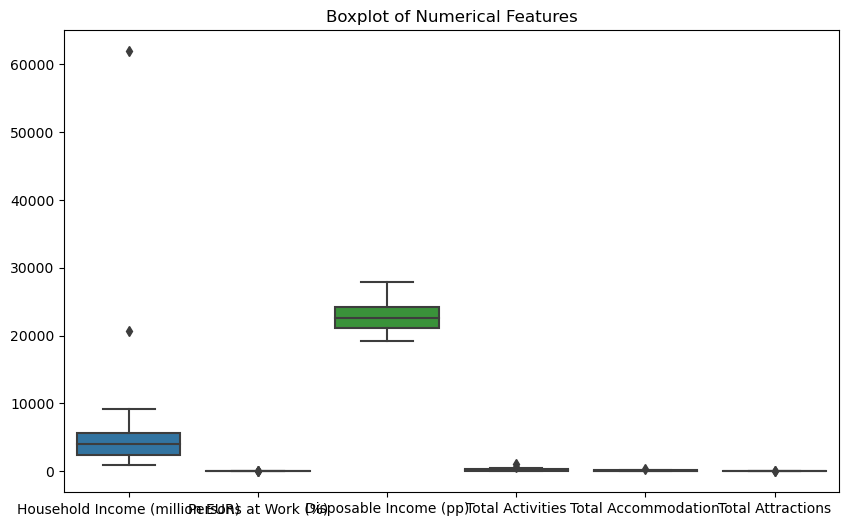

In [89]:
# Boxplots of data

# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title('Boxplot of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Adm Boxplot')

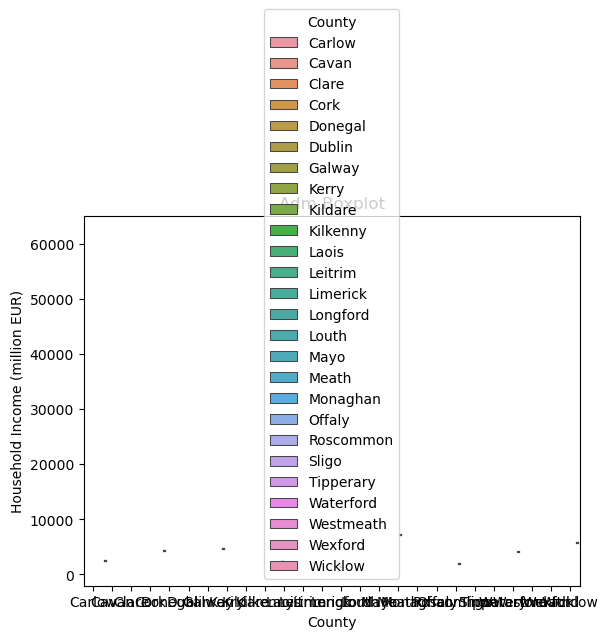

In [90]:
# Boxplots for each county to identidfy outliers 

#We create boxplot to identify outliers

sns.boxplot(x = 'County', y = 'Household Income (million EUR)', data = df, hue='County')
plt.title('Adm Boxplot')

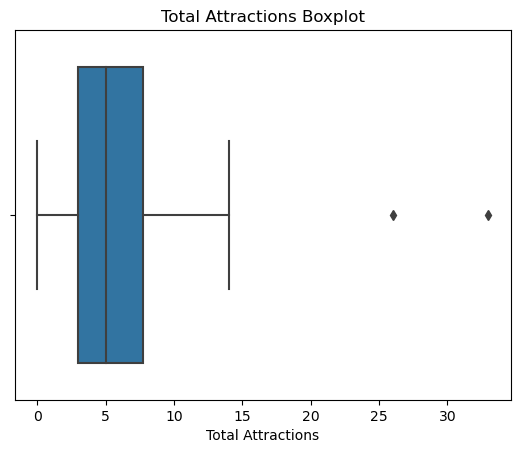

In [91]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Attractions")
plt.title('Total Attractions Boxplot')
plt.show();

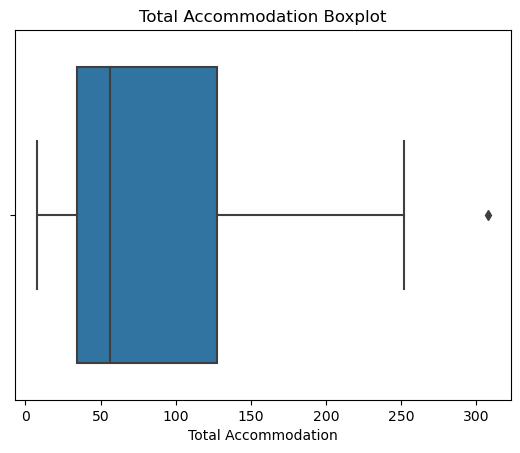

In [92]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Accommodation")
plt.title('Total Accommodation Boxplot')
plt.show();

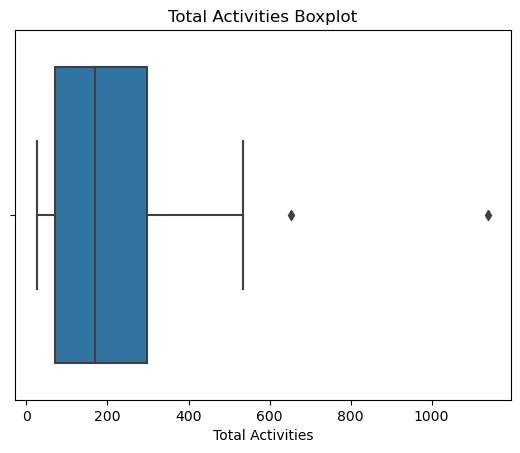

In [93]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Total Activities")
plt.title('Total Activities Boxplot')
plt.show();

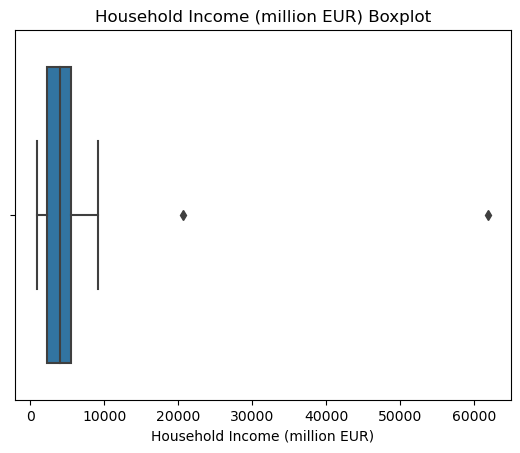

In [94]:
# Plotting individual boxplots

sns.boxplot(data=df, x="Household Income (million EUR)")
plt.title('Household Income (million EUR) Boxplot')
plt.show();

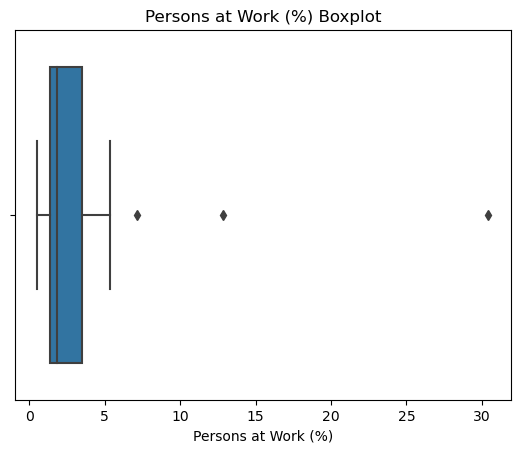

In [95]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Persons at Work (%)")
plt.title('Persons at Work (%) Boxplot')
plt.show();

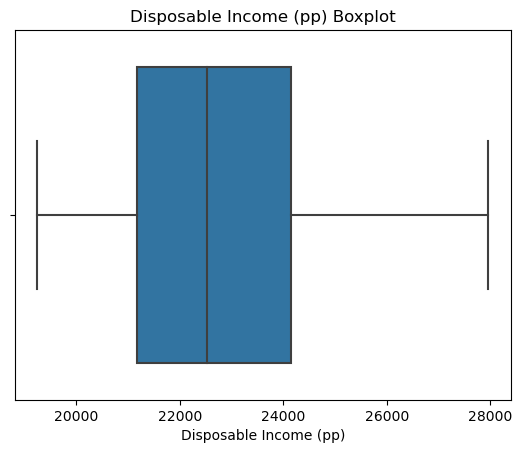

In [96]:
# Plotting individual boxplots 

sns.boxplot(data=df, x="Disposable Income (pp)");
plt.title('Disposable Income (pp) Boxplot')
plt.show() 

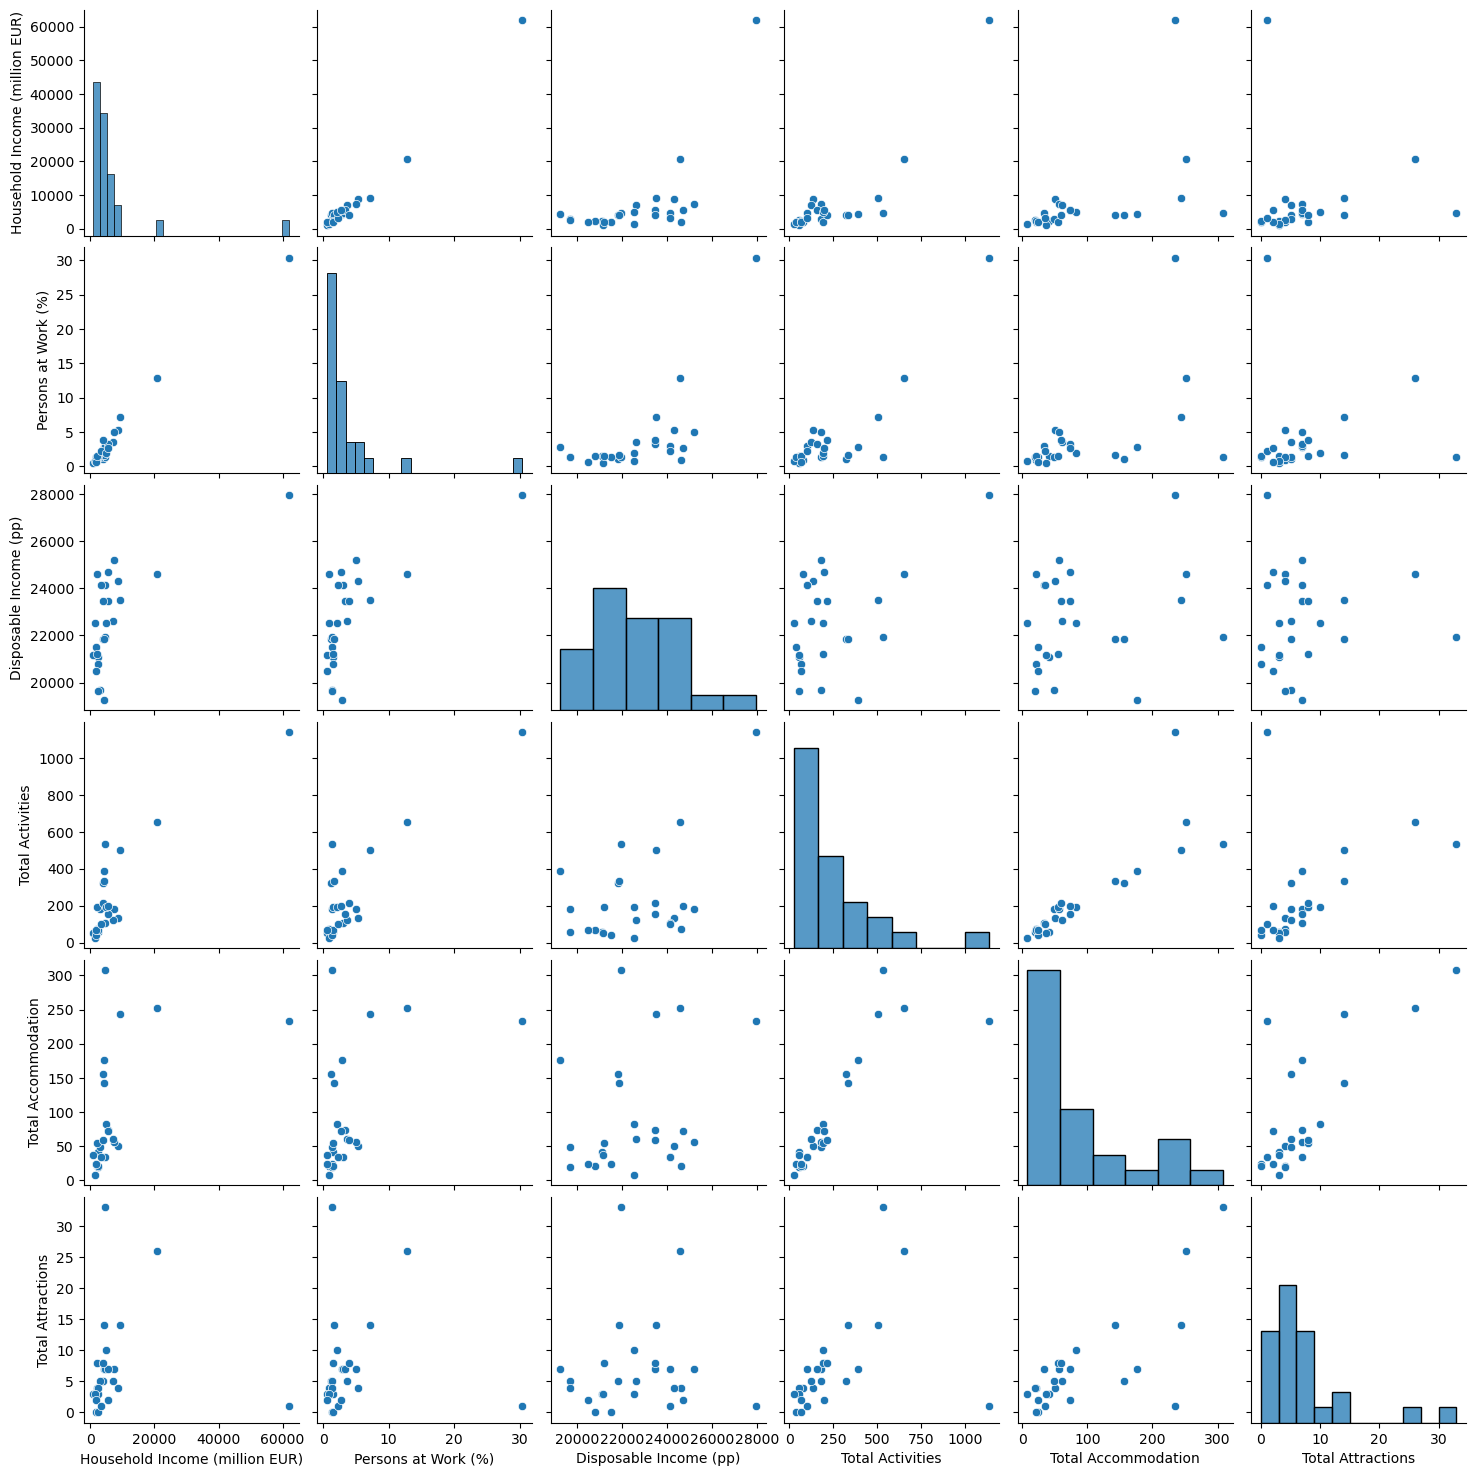

In [97]:
# Plot all features to check for obvious correlations 

sns.pairplot(df)

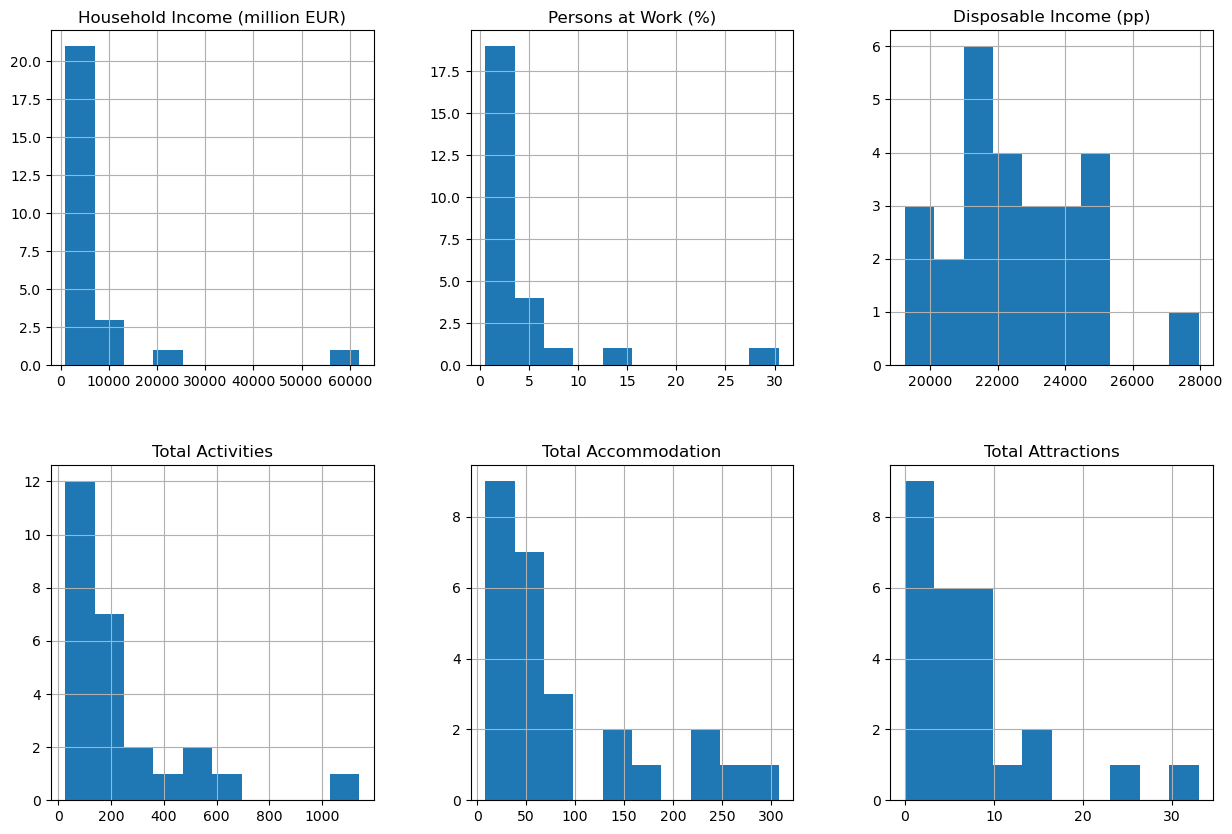

In [98]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['number'])

# Plot histograms for each numerical variable
num_cols.hist(layout=(2, 3), figsize=(15, 10))  # Adjust layout and figsize as needed
plt.show()

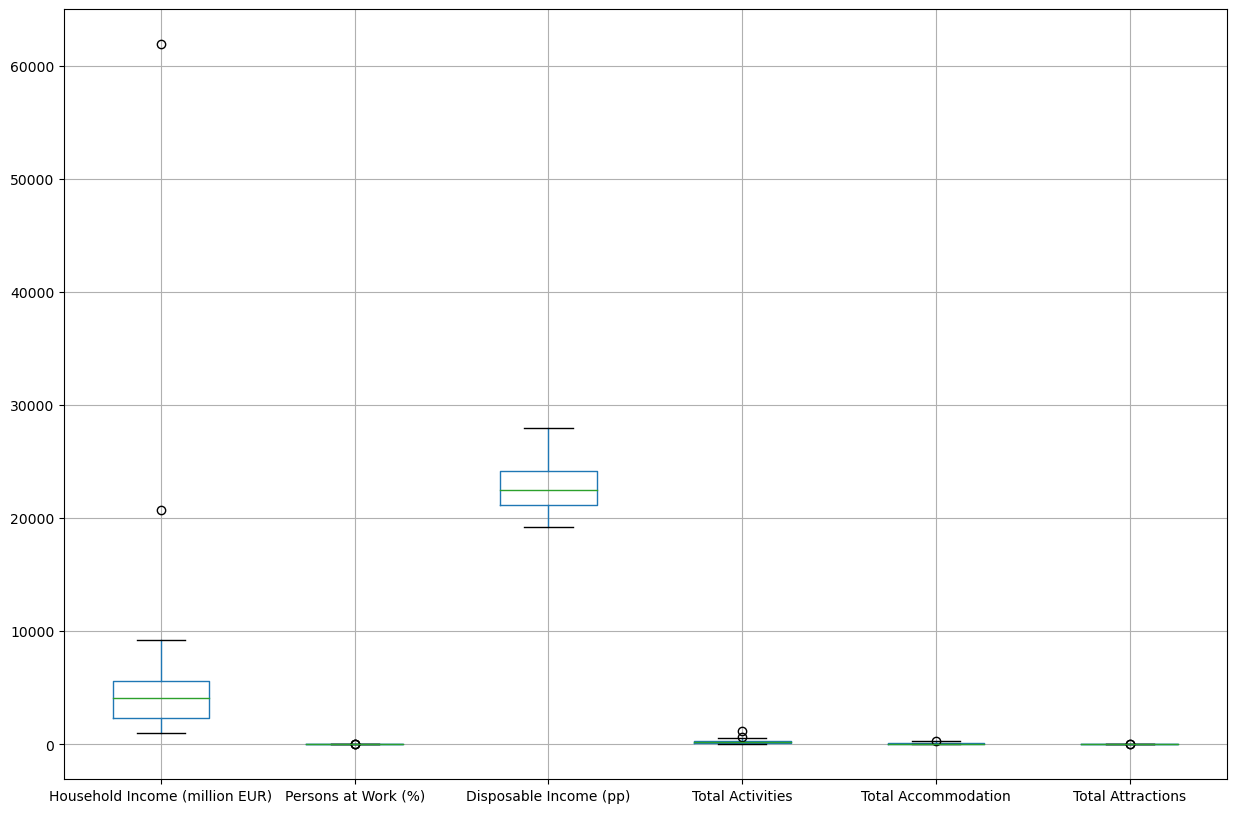

In [99]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=['number'])

# Plot box plots for each numerical variable
num_cols.boxplot(figsize=(15, 10))  # Adjust figsize as needed
plt.show()

### 2. Discrete Distribution

In [105]:
###Binomial 

from scipy.stats import binom

In [100]:
### Create a new discrete variable class which will categorise our data into three categories which analyses tourist attractions

In [101]:
#Create discrete variables based on quantile ranges within data for each County

# Calculate quantiles for numerical features
quantiles_activities = df['Total Activities'].quantile([0.33, 0.67])
quantiles_accommodation = df['Total Accommodation'].quantile([0.33, 0.67])
quantiles_attractions = df['Total Attractions'].quantile([0.33, 0.67])

# Assign labels for quantiles
def assign_category(row, quantiles_activities, quantiles_accommodation, quantiles_attractions):
    activity_cat = 'Low' if row['Total Activities'] <= quantiles_activities[0.33] else 'Middle' if row['Total Activities'] <= quantiles_activities[0.67] else 'High'
    accommodation_cat = 'Low' if row['Total Accommodation'] <= quantiles_accommodation[0.33] else 'Middle' if row['Total Accommodation'] <= quantiles_accommodation[0.67] else 'High'
    attractions_cat = 'Low' if row['Total Attractions'] <= quantiles_attractions[0.33] else 'Middle' if row['Total Attractions'] <= quantiles_attractions[0.67] else 'High'
    
    return activity_cat, accommodation_cat, attractions_cat

# Create category columns
df[['Activity Range', 'Accommodation Range', 'Attraction Range']] = df.apply(lambda x: assign_category(x, quantiles_activities, quantiles_accommodation, quantiles_attractions), axis=1, result_type='expand')


In [102]:
df.head()

,County,Household Income (million EUR),Persons at Work (%),Disposable Income (pp),Total Activities,Total Accommodation,Total Attractions,Activity Range,Accommodation Range,Attraction Range
0,Carlow,2032.30,0.88,24606.46,76,21,4,Low,Low,Middle
1,Cavan,2333.79,1.53,21096.88,55,41,3,Low,Middle,Low
2,Clare,3892.75,1.12,21834.88,324,156,5,High,High,Middle
3,Cork,20711.12,12.83,24599.56,653,252,26,High,High,High
4,Donegal,4242.44,2.91,19252.82,391,176,7,High,High,Middle


In [108]:
# Binomial Question #1

# Calculate the probability of a County having a high Household Income (million EUR) if it has a High 'Accomodation Range' 
# Using Binomial Probability Mass Function PMF)


# Calculate the Mean of Household Income (million EUR)
income_mean = df['Household Income (million EUR)'].mean()

# Calculate our n - Number of trials 
num_trials = len(df)

# Calculate our k - Number of results we care about
criteria = (df['Accommodation Range'] == 'High') & (df['Household Income (million EUR)'] > income_mean)
num_successes = sum(criteria)

# Calculate our p -Probability of success 
probability_of_success = binom.pmf(k=num_successes, n=num_trials, p=probability_of_success)

print("Probability of a County having 'High' accommodation range and an above average Household Income:", probability_of_success)


Probability of a County having 'High' accommodation range and an above average Household Income: 0.16003469660775876


### 3. Normal Distribution

### 4. Distribution Differentiation 